# Understand Your Data With Visualization

## I. Univariate Plots

**1.1 Histogram**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = pd.read_csv('pima-indians-diabetes.csv', names=names)

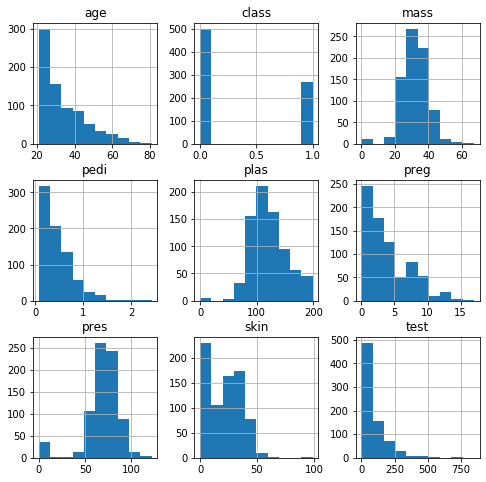

In [15]:
data.hist(figsize=(8,8)) # đồ thị histogram, figsize để chỉnh kích cỡ đồ thị
plt.show()

- Chúng ta thấy có vẻ như age, pendi và test có phân phối theo lũy thừa.
- Còn mass, pres, plas có thể có phân phối Gaussian (phân phối chuẩn) hoặc gần Gaussian.
Điều này là thú vị, bởi nhiều kĩ thuật trong machine learning giả định với phân phối Gaussian đơn biến (Gaussian univariate distribution) trên tập đầu vào.


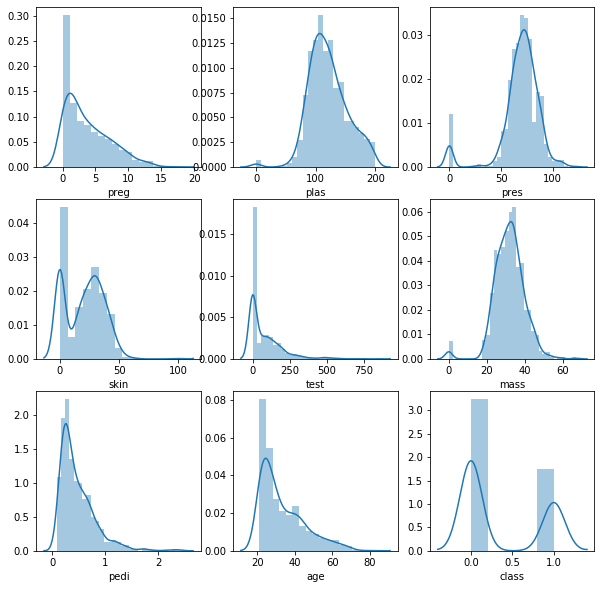

In [2]:
import seaborn as sns
f, ax = plt.subplots(3,3, figsize=(10, 10)) # 3 hàng, mỗi hàng 3 biểu đồ
for i, column in enumerate(data.columns):
    sns.distplot(data[column],  ax=ax[i//3,i%3]) # ax tương ứng với [0,0], [0,1], [0,2], [1,0], vâng vâng

**1.2 Density Plots**

Vẽ mật độ là một cách khác để xem nhanh về sự phân phối trên mỗi attribute. Nó giống như một bản phác thảo trên histogram với đường cong từ đầu đến cuối. Như kiểu ta đang dõi mắt theo instagram.

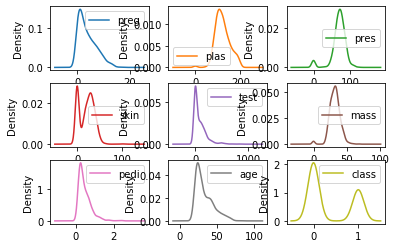

In [31]:
data.plot(kind='density', subplots=True, layout=(3,3), sharex=False)
plt.show()

Hoặc có thể kết hợp như dùng seaborn ở trên cũng được.

**1.3 Box and Whisker Plot**

Một cách hữu ích khác để nhìn ra phân phối của từng attribute là sử dụng Box and Whisker Plots hay là box-plots. Biểu đồ này tổng kết phân phối của từng attribute, vẽ một đường median (trung vị) và một hộp trong khoảng 25% và 75% (50% ở giữa dữ liệu!).<br>
Whisker(râu) cho thấy độ trải dài của dữ liệu và các dấu chấm bên ngoài râu là những candidate outliers (những giá trị lớn hơn 1,5 lần kích cỡ của độ trải dài ở 50% giữa dữ liệu.

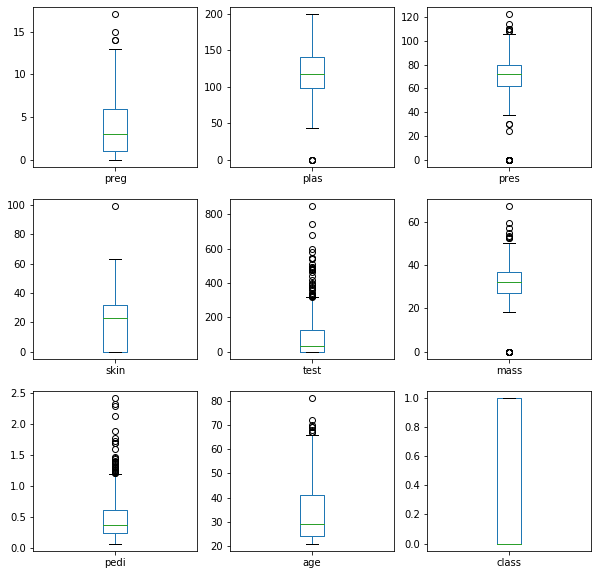

In [33]:
data.plot(kind='box', subplots=True, layout=(3,3), figsize=(10,10) ,sharex=False, sharey=False)
plt.show()

Độ trải dài của các attribute là khá khác nhau. Những cái như age, skin, test độ skew hướng về các giá trị nhỏ hơn.

## II. Multivariate Plots

**2.1 Correlation matrix plot**

Correlation chỉ ra sự thay đổi liên qua giữa 2 biến. Nếu 2 biến thay đổi cùng một hướng thì độ tương quan giữa chúng là dương. Còn nếu 2 biến thay đổi ngược hướng thì độ tương quan giữa chúng là âm.<br>
Hình ở dưới là ma trận tương quan. Khi vẽ ra cho bạn thêm ý tưởng về mối tương quan giữa các biến với nhau. Điều này là hữu ích, bởi một số thuật toán trong machine learning như linear và logistic regression biểu diễn tồi khi các biến đầu vào có độ tương quan cao.

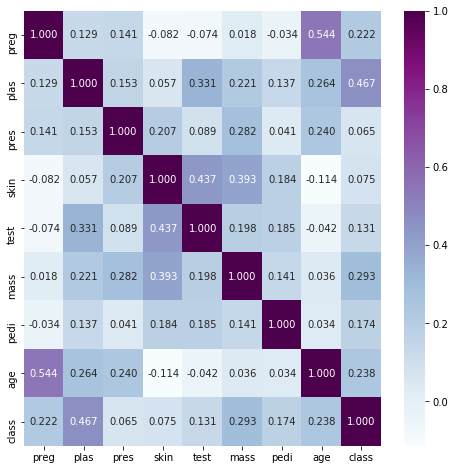

In [12]:
correlation = data.corr()
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(correlation,
           xticklabels=correlation.columns.values,
           yticklabels=correlation.columns.values,
           annot=True, fmt='.3f', ax=ax, cmap='BuPu')

**2.2 Scatter Plot Matrix**

Scatter plot cho thấy mối quan hệ giữa hai biến bằng những dấu chấm trong 2 dimension. Mỗi trục là một attribute. Vẽ các biểu đồ rải rác cùng với nhau được gọi là một ma trận biểu đồ rải rác (scatter plot matrix)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000023138710>,
      dtype=object)

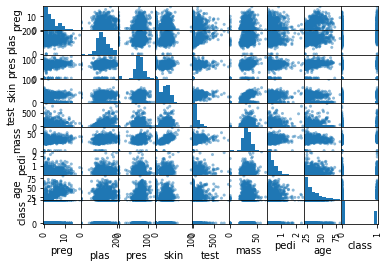

In [16]:
from pandas.plotting import scatter_matrix
scatter_matrix(data)

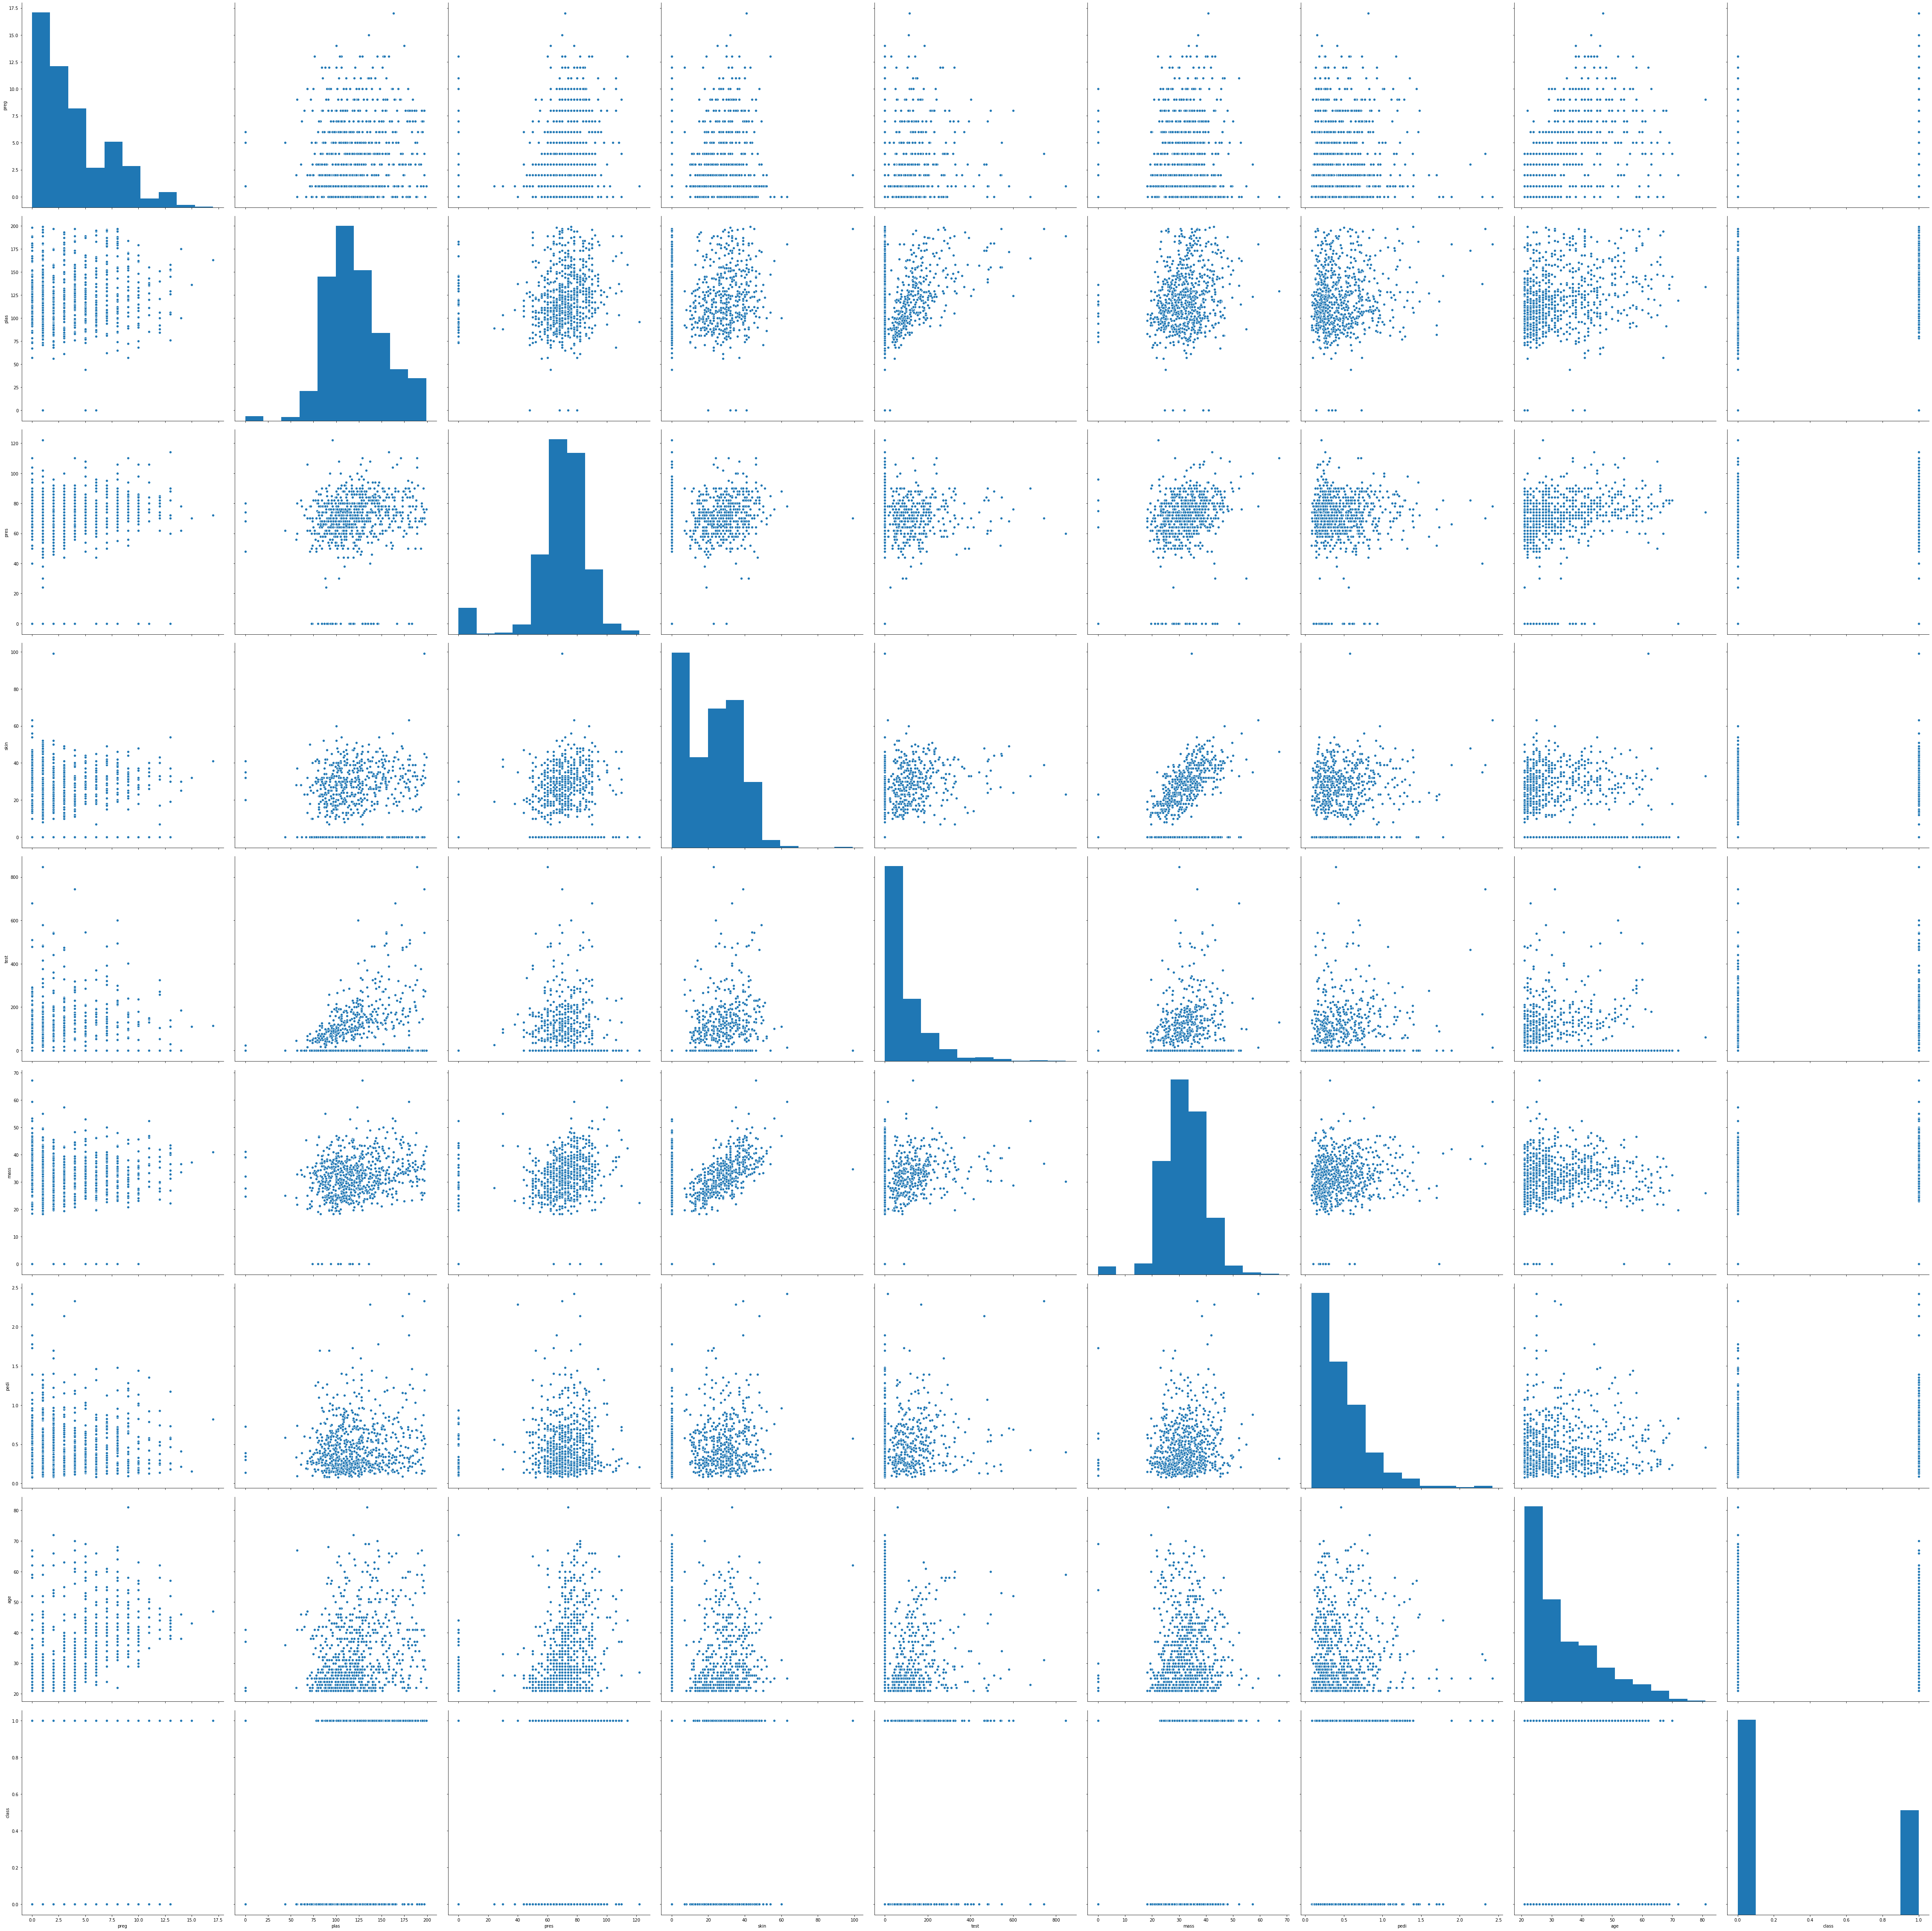

In [15]:
# Another way
sns.pairplot(data, height=7)